In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml
#from yaml import CLoader

In [5]:
%%time

with open('../data/ncbi_dataset/ncbi_dataset/data/data_report.yaml') as f:
    genomes = yaml.load(f, Loader=yaml.CLoader)

CPU times: user 6min 52s, sys: 5min 33s, total: 12min 26s
Wall time: 16min 41s


In [6]:
pickle.dump(genomes, open('../data/2020_08_18_genomes.pickle', 'w'))

NameError: name 'pickle' is not defined

In [7]:
len(genomes['genomes'])

14050

In [8]:
dict.

SyntaxError: invalid syntax (<ipython-input-8-2d3b4efd8f37>, line 1)

In [9]:
def drop_dict(d, key):
    """Drops (or pops) a key from a dictionary and (unlike .pop) return the new dictionary"""
    try: 
        d.pop(key)
    except KeyError: 
        pass #if key is missing, just proceed
    return d

In [10]:
[genome['virus']['sciName'] for genome in genomes['genomes']]

['Infectious bronchitis virus',
 'Bovine coronavirus',
 'Murine hepatitis virus',
 'Infectious bronchitis virus',
 'Feline infectious peritonitis virus',
 'Human coronavirus 229E',
 'Porcine epidemic diarrhea virus',
 'Porcine epidemic diarrhea virus',
 'Bovine coronavirus',
 'Bovine coronavirus',
 'Bovine coronavirus',
 'Bovine coronavirus',
 'SARS coronavirus Tor2',
 'SARS coronavirus Tor2',
 'SARS coronavirus CUHK-W1',
 'SARS coronavirus HKU-39849',
 'SARS coronavirus Urbani',
 'SARS coronavirus BJ03',
 'SARS coronavirus GD01',
 'SARS coronavirus BJ01',
 'SARS coronavirus BJ02',
 'SARS coronavirus BJ04',
 'SARS coronavirus CUHK-Su10',
 'SARS coronavirus Sin2774',
 'SARS coronavirus Sin2748',
 'SARS coronavirus Sin2679',
 'SARS coronavirus Sin2677',
 'SARS coronavirus Sin2500',
 'SARS coronavirus TW1',
 'SARS coronavirus ZJ01',
 'SARS coronavirus Frankfurt 1',
 'SARS coronavirus TWC',
 'SARS coronavirus HSR 1',
 'SARS coronavirus Taiwan TC2',
 'SARS coronavirus Taiwan TC1',
 'Infecti

In [11]:
genomes_noanno = [drop_dict(genome, 'annotation') for genome in genomes['genomes']]

In [12]:
genomes_noanno

[{'accession': 'NC_001451.1',
  'releaseDate': '1993-06-12',
  'updateDate': '2018-08-13',
  'sourceDatabase': 'RefSeq',
  'virus': {'taxId': 11120,
   'sciName': 'Infectious bronchitis virus',
   'lineage': [{'name': 'Viruses', 'taxId': 10239},
    {'name': 'Riboviria (RNA viruses)', 'taxId': 2559587},
    {'name': 'Orthornavirae', 'taxId': 2732396},
    {'name': 'Pisuviricota', 'taxId': 2732408},
    {'name': 'Pisoniviricetes', 'taxId': 2732506},
    {'name': 'Nidovirales', 'taxId': 76804},
    {'name': 'Cornidovirineae', 'taxId': 2499399},
    {'name': 'Coronaviridae', 'taxId': 11118},
    {'name': 'Orthocoronavirinae', 'taxId': 2501931},
    {'name': 'Gammacoronavirus', 'taxId': 694013},
    {'name': 'Igacovirus', 'taxId': 2509487},
    {'name': 'Avian coronavirus (ACoV)', 'taxId': 694014},
    {'name': 'Infectious bronchitis virus', 'taxId': 11120}]},
  'molType': 'ssRNA(+)',
  'nucleotideCompleteness': 'complete',
  'length': 27608,
  'geneCount': 6,
  'proteinCount': 10,
  'matu

In [13]:
genomes_df = pd.DataFrame(genomes_noanno)

genomes_df['sciName'] = genomes_df['virus'].apply(lambda x: x['sciName'])

In [14]:
genomes_df.groupby('sciName').count().sort_values('accession', ascending=False)

,accession,releaseDate,updateDate,sourceDatabase,virus,molType,nucleotideCompleteness,length,geneCount,proteinCount,maturePeptideCount,isolate,location,host
sciName,,,,,,,,,,,,,,
Severe acute respiratory syndrome coronavirus 2,11082,11082,11082,11082,11082,11082,11082,11082,11066,11082,10729,11082,11082,11076
Porcine epidemic diarrhea virus,652,652,652,652,652,652,652,652,313,647,1,641,645,620
Middle East respiratory syndrome-related coronavirus,522,522,522,522,522,522,522,522,427,522,1,521,520,516
Infectious bronchitis virus,415,415,415,415,415,415,415,415,319,413,1,397,402,389
Human coronavirus OC43,170,170,170,170,170,170,170,170,143,170,3,167,162,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Miniopterus bat coronavirus 1,1,1,1,1,1,1,1,1,1,1,0,0,1,0
Bat coronavirus HKU9-10-1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Bat coronavirus HKU9-10-2,1,1,1,1,1,1,1,1,1,1,0,1,1,1


<AxesSubplot:ylabel='Frequency'>

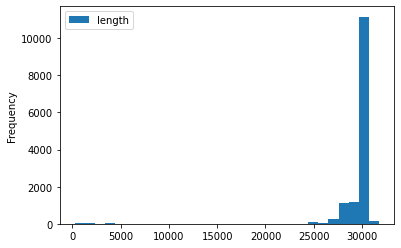

In [15]:
genomes_df[['length']].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

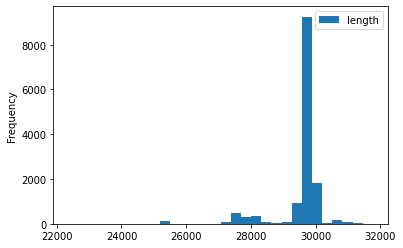

In [16]:
genomes_df[['length']][genomes_df['length'] > 20000].plot.hist(bins=30)

/Users/alys/.virtualenvs/notebooks/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='sciName'>

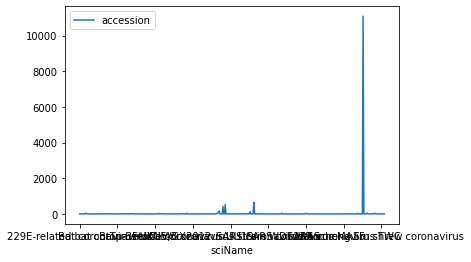

In [17]:
genomes_df.groupby('sciName').count().plot(y='accession')

<AxesSubplot:ylabel='sciName'>

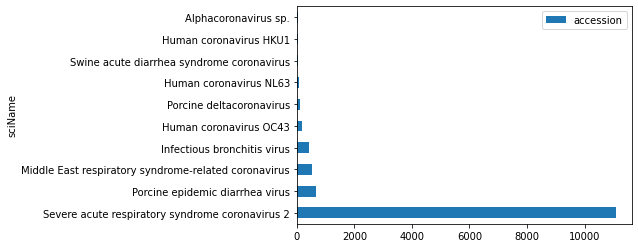

In [18]:
genomes_df.groupby('sciName').count().sort_values('accession', ascending=False).head(10).plot(y='accession', kind='barh')

In [19]:


genomes_df['location'].dropna().apply(lambda x: x['geographicLocation'])

4                                               USA
12                                  Canada: Toronto
13                                  Canada: Toronto
14       China: Hong Kong, Prince of Wales Hospital
23                                        Singapore
                            ...                    
14045                                       USA: FL
14046                                       USA: FL
14047                                       USA: FL
14048                                       USA: FL
14049                                       USA: FL
Name: location, Length: 13886, dtype: object

In [20]:
import geopandas

In [21]:
from geopy.geocoders import GeocodeFarm

import geopy

In [22]:
geolocator= GeocodeFarm()

In [24]:
example = geolocator.geocode('China: Hong Kong, Prince of Wales Hospital')

example

Location(Prince of Wales Hospital, Hong Kong SAR, Hong Kong SAR, (22.3796997070366, 114.201698303187, 0.0))

In [ ]:
example.latitude

In [ ]:
genomes_df['location'].dropna().apply(lambda x: x['geographicLocation']).unique()

In [25]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="coronavirus_genome_mapper")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)





In [58]:
#cache = dict()
#counter = 0
#cached_counter = 0

def cached_geocode(location):
    global counter, cached_counter, cache
    if (counter % 100) == 0:
        print(f"geocoded {counter} locations ({cached_counter/max(1, counter)}% cached)")
    counter += 1
    if location in cache:
        cached_counter += 1
        return cache[location]
    else:
        cache[location] = geocode(location)
        return cache[location]

In [61]:
cached_geocode("chicago")

Location(Chicago, Cook County, Illinois, United States of America, (41.8755616, -87.6244212, 0.0))

In [62]:
cached_counter

1

In [ ]:
import functools

In [ ]:
genomes_df_top = genomes_df.head(10)

In [85]:
genomes_df['point'] = genomes_df['location'].apply(lambda loc: cached_geocode(loc['geographicLocation'] if type(loc) != float else None))

geocoded 14100 locations (0.9658156028368794% cached)
geocoded 14200 locations (0.966056338028169% cached)
geocoded 14300 locations (0.9662937062937063% cached)
geocoded 14400 locations (0.9665277777777778% cached)
geocoded 14500 locations (0.9667586206896551% cached)
geocoded 14600 locations (0.966986301369863% cached)
geocoded 14700 locations (0.9672108843537415% cached)
geocoded 14800 locations (0.9674324324324325% cached)
geocoded 14900 locations (0.9676510067114094% cached)
geocoded 15000 locations (0.9678666666666667% cached)
geocoded 15100 locations (0.9680794701986755% cached)
geocoded 15200 locations (0.9682894736842105% cached)
geocoded 15300 locations (0.9684967320261438% cached)
geocoded 15400 locations (0.9687012987012987% cached)
geocoded 15500 locations (0.9689032258064516% cached)
geocoded 15600 locations (0.9691025641025641% cached)
geocoded 15700 locations (0.9692993630573249% cached)
geocoded 15800 locations (0.969493670886076% cached)
geocoded 15900 locations (0.969

In [68]:
genomes_df

,accession,releaseDate,updateDate,sourceDatabase,virus,molType,nucleotideCompleteness,length,geneCount,proteinCount,maturePeptideCount,isolate,location,host,sciName,point
0,NC_001451.1,1993-06-12,2018-08-13,RefSeq,"{'taxId': 11120, 'sciName': 'Infectious bronch...",ssRNA(+),complete,27608,6.0,10.0,14.0,NaN,NaN,NaN,Infectious bronchitis virus,"(None, Provincia di Torino, Piemonte, Italia, ..."
1,U00735.2,1993-09-02,2003-04-23,GenBank,"{'taxId': 11128, 'sciName': 'Bovine coronaviru...",ssRNA(+),complete,31032,5.0,10.0,4.0,NaN,NaN,NaN,Bovine coronavirus,"(None, Provincia di Torino, Piemonte, Italia, ..."
2,NC_001846.1,1997-11-22,2018-08-13,RefSeq,"{'taxId': 11138, 'sciName': 'Murine hepatitis ...",ssRNA(+),complete,31357,4.0,5.0,NaN,NaN,NaN,NaN,Murine hepatitis virus,"(None, Provincia di Torino, Piemonte, Italia, ..."
3,AF095702.1,1999-04-15,2016-07-26,GenBank,"{'taxId': 11120, 'sciName': 'Infectious bronch...",ssRNA(+),complete,1626,1.0,1.0,NaN,NaN,NaN,NaN,Infectious bronchitis virus,"(None, Provincia di Torino, Piemonte, Italia, ..."
4,NC_002306.3,2000-05-11,2018-08-13,RefSeq,"{'taxId': 11135, 'sciName': 'Feline infectious...",ssRNA(+),complete,29355,10.0,9.0,NaN,{'name': '79-1146'},"{'geographicLocation': 'USA', 'geographicRegio...",NaN,Feline infectious peritonitis virus,"(United States, (39.7837304, -100.4458825))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14045,MT893667.1,2020-08-18,2020-08-18,GenBank,"{'taxId': 2697049, 'sciName': 'Severe acute re...",ssRNA(+),complete,29853,11.0,12.0,26.0,{'name': 'SARS-CoV-2/human/USA/FL-BPHL-0749/20...,"{'geographicLocation': 'USA: FL', 'geographicR...","{'taxId': 9606, 'sciName': 'Homo sapiens', 'li...",Severe acute respiratory syndrome coronavirus 2,"(Florida, United States of America, (27.756766..."
14046,MT893664.1,2020-08-18,2020-08-18,GenBank,"{'taxId': 2697049, 'sciName': 'Severe acute re...",ssRNA(+),complete,29855,11.0,12.0,26.0,{'name': 'SARS-CoV-2/human/USA/FL-BPHL-0746/20...,"{'geographicLocation': 'USA: FL', 'geographicR...","{'taxId': 9606, 'sciName': 'Homo sapiens', 'li...",Severe acute respiratory syndrome coronavirus 2,"(Florida, United States of America, (27.756766..."
14047,MT893662.1,2020-08-18,2020-08-18,GenBank,"{'taxId': 2697049, 'sciName': 'Severe acute re...",ssRNA(+),complete,29821,11.0,12.0,26.0,{'name': 'SARS-CoV-2/human/USA/FL-BPHL-0744/20...,"{'geographicLocation': 'USA: FL', 'geographicR...","{'taxId': 9606, 'sciName': 'Homo sapiens', 'li...",Severe acute respiratory syndrome coronavirus 2,"(Florida, United States of America, (27.756766..."
14048,MT893661.1,2020-08-18,2020-08-18,GenBank,"{'taxId': 2697049, 'sciName': 'Severe acute re...",ssRNA(+),complete,29851,11.0,12.0,26.0,{'name': 'SARS-CoV-2/human/USA/FL-BPHL-0743/20...,"{'geographicLocation': 'USA: FL', 'geographicR...","{'taxId': 9606, 'sciName': 'Homo sapiens', 'li...",Severe acute respiratory syndrome coronavirus 2,"(Florida, United States of America, (27.756766..."


In [35]:
hasattr

0        None
1        None
2        None
3        None
4        None
         ... 
14045    None
14046    None
14047    None
14048    None
14049    None
Name: point, Length: 14050, dtype: object

In [79]:
def get_point(loc):
    try:
        return (loc.latitude, loc.longitude, 0)
    except AttributeError:
        return None

In [87]:
 genomes_df['point'].apply(get_point)

0             (44.933143, 7.540121, 0)
1             (44.933143, 7.540121, 0)
2             (44.933143, 7.540121, 0)
3             (44.933143, 7.540121, 0)
4        (39.7837304, -100.4458825, 0)
                     ...              
14045     (27.7567667, -81.4639835, 0)
14046     (27.7567667, -81.4639835, 0)
14047     (27.7567667, -81.4639835, 0)
14048     (27.7567667, -81.4639835, 0)
14049     (27.7567667, -81.4639835, 0)
Name: point, Length: 14050, dtype: object

In [123]:
genomes_df['point2'] = genomes_df['point'].apply(get_point)

genomes_coords = pd.DataFrame(genomes_df['point2'].to_list())

genomes_coords.columns = ["lat", 'lon', 'elevation']

genomes_df2 = pd.concat([genomes_df, genomes_coords], axis=1)

In [106]:
genomes_df2.to_csv("../output/2020_08_19_Genomes Geocoded.csv")

In [107]:
def lon_to_web_mercator(lon):
    k = 6378137
    return lon * (k * np.pi / 180.0)


def lat_to_web_mercator(lat):
    k = 6378137
    return np.log(np.tan((90 + lat) * np.pi / 360.0)) * k


def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["lon"] = df[lon] * (k * np.pi / 180.0)
    df["lat"] = np.log(np.tan((90 + df[lat]) * np.pi / 360.0)) * k
    return df


In [108]:
locations = pd.DataFrame(dict(lat=[ 30.29,  30.20,  30.29],
              lon=[-97.70, -97.74, -97.78]))

In [170]:
#with pd.option_context('display.max_rows', 10**6):
#pd.set_option('display.max_rows', None)
top_ten = genomes_df2.groupby('sciName').count().sort_values('accession').tail(10)

top_ten = top_ten.index.to_list()


KeyError: 'sciName'

In [178]:
top_ten

['Human coronavirus HKU1',
 'Alphacoronavirus sp.',
 'Swine acute diarrhea syndrome coronavirus',
 'Human coronavirus NL63',
 'Porcine deltacoronavirus',
 'Human coronavirus OC43',
 'Infectious bronchitis virus',
 'Middle East respiratory syndrome-related coronavirus',
 'Porcine epidemic diarrhea virus',
 'Severe acute respiratory syndrome coronavirus 2']

In [182]:
from bokeh.palettes import Set3  


Set3[]

{3: ['#8dd3c7', '#ffffb3', '#bebada'],
 4: ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'],
 5: ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3'],
 6: ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462'],
 7: ['#8dd3c7',
  '#ffffb3',
  '#bebada',
  '#fb8072',
  '#80b1d3',
  '#fdb462',
  '#b3de69'],
 8: ['#8dd3c7',
  '#ffffb3',
  '#bebada',
  '#fb8072',
  '#80b1d3',
  '#fdb462',
  '#b3de69',
  '#fccde5'],
 9: ['#8dd3c7',
  '#ffffb3',
  '#bebada',
  '#fb8072',
  '#80b1d3',
  '#fdb462',
  '#b3de69',
  '#fccde5',
  '#d9d9d9'],
 10: ['#8dd3c7',
  '#ffffb3',
  '#bebada',
  '#fb8072',
  '#80b1d3',
  '#fdb462',
  '#b3de69',
  '#fccde5',
  '#d9d9d9',
  '#bc80bd'],
 11: ['#8dd3c7',
  '#ffffb3',
  '#bebada',
  '#fb8072',
  '#80b1d3',
  '#fdb462',
  '#b3de69',
  '#fccde5',
  '#d9d9d9',
  '#bc80bd',
  '#ccebc5'],
 12: ['#8dd3c7',
  '#ffffb3',
  '#bebada',
  '#fb8072',
  '#80b1d3',
  '#fdb462',
  '#b3de69',
  '#fccde5',
  '#d9d9d9',
  '#bc80bd',
  '#ccebc5',
  '#ffed6f']}

In [166]:
pd.set_option('display.max_rows', 100)


In [187]:
from bokeh.palettes import Spectral11
factor_cmap('type', palette=Spectral11, factors=top_ten)

{'field': 'type', 'transform': CategoricalColorMapper(id='3946', ...)}

In [191]:
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral11

#output_file("tile.html")
output_notebook()

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)


#source = ColumnDataSource(
#    data=wgs84_to_web_mercator(locations))

p.circle(x="lon", y="lat", size=15, 
         #fill_color="blue", 
         fill_color=factor_cmap('sciName', palette=Spectral11, factors=top_ten),
         fill_alpha=0.1, source=wgs84_to_web_mercator(genomes_df2.loc[:,["lat", "lon", 'sciName']]))


#output_notebook(p)
show(p)


Loading BokehJS ...

In [133]:
genomes_df2.head()

,accession,releaseDate,updateDate,sourceDatabase,virus,molType,nucleotideCompleteness,length,geneCount,proteinCount,maturePeptideCount,isolate,location,host,sciName,point,point2,lat,lon,elevation
0,NC_001451.1,1993-06-12,2018-08-13,RefSeq,"{'taxId': 11120, 'sciName': 'Infectious bronch...",ssRNA(+),complete,27608,6.0,10.0,14.0,NaN,NaN,NaN,Infectious bronchitis virus,"(None, Provincia di Torino, Piemonte, Italia, ...","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
1,U00735.2,1993-09-02,2003-04-23,GenBank,"{'taxId': 11128, 'sciName': 'Bovine coronaviru...",ssRNA(+),complete,31032,5.0,10.0,4.0,NaN,NaN,NaN,Bovine coronavirus,"(None, Provincia di Torino, Piemonte, Italia, ...","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
2,NC_001846.1,1997-11-22,2018-08-13,RefSeq,"{'taxId': 11138, 'sciName': 'Murine hepatitis ...",ssRNA(+),complete,31357,4.0,5.0,NaN,NaN,NaN,NaN,Murine hepatitis virus,"(None, Provincia di Torino, Piemonte, Italia, ...","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
3,AF095702.1,1999-04-15,2016-07-26,GenBank,"{'taxId': 11120, 'sciName': 'Infectious bronch...",ssRNA(+),complete,1626,1.0,1.0,NaN,NaN,NaN,NaN,Infectious bronchitis virus,"(None, Provincia di Torino, Piemonte, Italia, ...","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
4,NC_002306.3,2000-05-11,2018-08-13,RefSeq,"{'taxId': 11135, 'sciName': 'Feline infectious...",ssRNA(+),complete,29355,10.0,9.0,NaN,{'name': '79-1146'},"{'geographicLocation': 'USA', 'geographicRegio...",NaN,Feline infectious peritonitis virus,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0)",39.783730,-100.445882,0.0


In [122]:
genomes_df2.loc[:,["lat", "lon"]]

,lat,lon
0,NaN,1.288945e+26
1,NaN,1.288945e+26
2,NaN,1.288945e+26
3,NaN,1.288945e+26
4,NaN,-1.717071e+27
...,...,...
14045,NaN,-1.392585e+27
14046,NaN,-1.392585e+27
14047,NaN,-1.392585e+27
14048,NaN,-1.392585e+27


In [115]:
eval("""{'taxId': 9606, 'sciName': 'Homo sapiens', 'lineage': [{'name': 'cellular organisms', 'taxId': 131567}, {'name': 'Eukaryota (eucaryotes)', 'taxId': 2759}, {'name': 'Opisthokonta', 'taxId': 33154}, {'name': 'Metazoa (metazoans)', 'taxId': 33208}, {'name': 'Eumetazoa', 'taxId': 6072}, {'name': 'Bilateria', 'taxId': 33213}, {'name': 'Deuterostomia (deuterostomes)', 'taxId': 33511}, {'name': 'Chordata (chordates)', 'taxId': 7711}, {'name': 'Craniata', 'taxId': 89593}, {'name': 'Vertebrata (vertebrates)', 'taxId': 7742}, {'name': 'Gnathostomata (jawed vertebrates)', 'taxId': 7776}, {'name': 'Teleostomi', 'taxId': 117570}, {'name': 'Euteleostomi (bony vertebrates)', 'taxId': 117571}, {'name': 'Sarcopterygii', 'taxId': 8287}, {'name': 'Dipnotetrapodomorpha', 'taxId': 1338369}, {'name': 'Tetrapoda (tetrapods)', 'taxId': 32523}, {'name': 'Amniota (amniotes)', 'taxId': 32524}, {'name': 'Mammalia (mammals)', 'taxId': 40674}, {'name': 'Theria', 'taxId': 32525}, {'name': 'Eutheria (placentals)', 'taxId': 9347}, {'name': 'Boreoeutheria', 'taxId': 1437010}, {'name': 'Euarchontoglires', 'taxId': 314146}, {'name': 'Primates', 'taxId': 9443}, {'name': 'Haplorrhini', 'taxId': 376913}, {'name': 'Simiiformes', 'taxId': 314293}, {'name': 'Catarrhini', 'taxId': 9526}, {'name': 'Hominoidea (apes)', 'taxId': 314295}, {'name': 'Hominidae (great apes)', 'taxId': 9604}, {'name': 'Homininae', 'taxId': 207598}, {'name': 'Homo (humans)', 'taxId': 9605}, {'name': 'Homo sapiens (human)', 'taxId': 9606}]}""")

{'taxId': 9606,
 'sciName': 'Homo sapiens',
 'lineage': [{'name': 'cellular organisms', 'taxId': 131567},
  {'name': 'Eukaryota (eucaryotes)', 'taxId': 2759},
  {'name': 'Opisthokonta', 'taxId': 33154},
  {'name': 'Metazoa (metazoans)', 'taxId': 33208},
  {'name': 'Eumetazoa', 'taxId': 6072},
  {'name': 'Bilateria', 'taxId': 33213},
  {'name': 'Deuterostomia (deuterostomes)', 'taxId': 33511},
  {'name': 'Chordata (chordates)', 'taxId': 7711},
  {'name': 'Craniata', 'taxId': 89593},
  {'name': 'Vertebrata (vertebrates)', 'taxId': 7742},
  {'name': 'Gnathostomata (jawed vertebrates)', 'taxId': 7776},
  {'name': 'Teleostomi', 'taxId': 117570},
  {'name': 'Euteleostomi (bony vertebrates)', 'taxId': 117571},
  {'name': 'Sarcopterygii', 'taxId': 8287},
  {'name': 'Dipnotetrapodomorpha', 'taxId': 1338369},
  {'name': 'Tetrapoda (tetrapods)', 'taxId': 32523},
  {'name': 'Amniota (amniotes)', 'taxId': 32524},
  {'name': 'Mammalia (mammals)', 'taxId': 40674},
  {'name': 'Theria', 'taxId': 32525}